<a href="https://colab.research.google.com/github/hyuntaedo/FastCampus_DataMining_Problem/blob/main/Chapter_4_%EC%83%88%EB%A1%9C_%EC%B6%9C%EC%8B%9C%EB%90%9C_%EA%B2%8C%EC%9E%84%2C_%EC%A0%84%EB%AC%B8%EA%B0%80_%EB%A6%AC%EB%B7%B0_%EB%AF%BF%EA%B3%A0_%EB%B0%94%EB%A1%9C_%EA%B5%AC%EB%A7%A4%ED%95%B4%EB%8F%84_%EB%90%A0%EA%B9%8C%EC%9A%94__%EC%A7%81%EC%A0%91_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A1%9C_%EB%B6%84%EC%84%9D%ED%95%98%EA%B3%A0_%ED%8C%90%EB%8B%A8%ED%95%B4_%EB%B3%B4%EC%9E%90!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주제 : 새로 출시된 게임, 전문가 리뷰 믿고 바로 구매해도 될까요? 직접 데이터로 분석하고 판단해 보자!
----------

## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 Video Game Sales with Ratings을 사용합니다.
    
    - 다음 1개의 csv 파일을 사용합니다.
    Video_Games_Sales_as_at_22_Dec_2016.csv
    
    - 각 파일의 컬럼은 아래와 같습니다.
    Name: 게임의 이름
    Platform: 게임이 동작하는 콘솔
    Year_of_Release: 발매 년도
    Genre: 게임의 장르
    Publisher: 게임의 유통사
    NA_Sales: 북미 판매량 (Millions)
    EU_Sales: 유럽 연합 판매량 (Millions)
    JP_Sales: 일본 판매량 (Millions)
    Other_Sales: 기타 판매량 (아프리카, 일본 제외 아시아, 호주, EU 제외 유럽, 남미) (Millions)
    Global_Sales: 전국 판매량
    Critic_Score: Metacritic 스태프 점수
    Critic_Count: Critic_Score에 사용된 점수의 수
    User_Score: Metacritic 구독자의 점수
    User_Count: User_Score에 사용된 점수의 수
    Developer: 게임의 개발사
    Rating: ESRB 등급 (19+, 17+, 등등)

    
- 데이터 출처: https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings

## 최종 목표
    - 흥미로운 일상적인 데이터 분석해 보기
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - 학습된 모델로 부터의 인사이트 획득 방법 습득

- 출제자 : 신제용 강사
---

## Step 1. 데이터셋 준비하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [2]:
import os

In [3]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME'] = 'fastcampuskim'
os.environ['KAGGLE_KEY'] = 'c939a1e37f5ca93b6406a66fc8bb08e5'

### 문제 2. 데이터 다운로드 및 압축 해제하기


In [4]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기
!rm *.*
!kaggle datasets download -d rush4ratio/video-game-sales-with-ratings
!unzip '*.zip'

  0% 0.00/476k [00:00<?, ?B/s]
100% 476k/476k [00:00<00:00, 58.9MB/s]
Archive:  video-game-sales-with-ratings.zip
  inflating: Video_Games_Sales_as_at_22_Dec_2016.csv  


### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [5]:
df = pd.read_csv('/content/Video_Games_Sales_as_at_22_Dec_2016.csv')

## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 4. 결손 데이터 데이터프레임에서 제거하기


In [6]:
# dropna() 메소드를 이용하여 결손 데이터가 포함된 row를 제거
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [8]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [9]:
len(df)

16719

In [10]:
df.dropna(inplace=True)

### 문제 5. 수치형 데이터의 히스토그램 확인하기


In [11]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

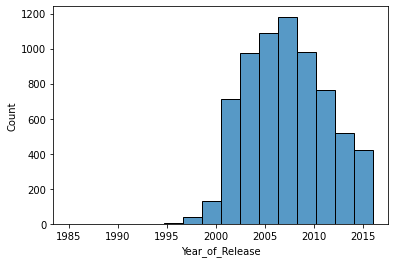

In [12]:
# Seaborn의 histplot()을 이용하여 히스토그램 확인
# 값의 범위가 넓어 히스토그램 분석이 어려울 경우, 아웃라이어를 제거하면서 히스토그램 확인
sns.histplot(data=df,x='Year_of_Release',bins=16)

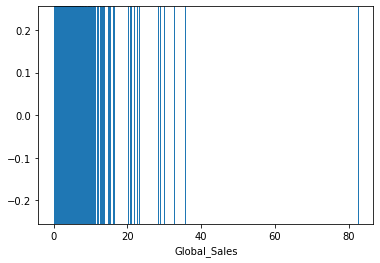

In [13]:
sns.rugplot(data=df,x='Global_Sales',height=1) # 아웃라이어 제거요망

In [14]:
df[df['Global_Sales'] > 30]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E


In [15]:
gs1 = df['Global_Sales'].quantile(0.99)

In [16]:
df = df[df['Global_Sales'] < gs1]

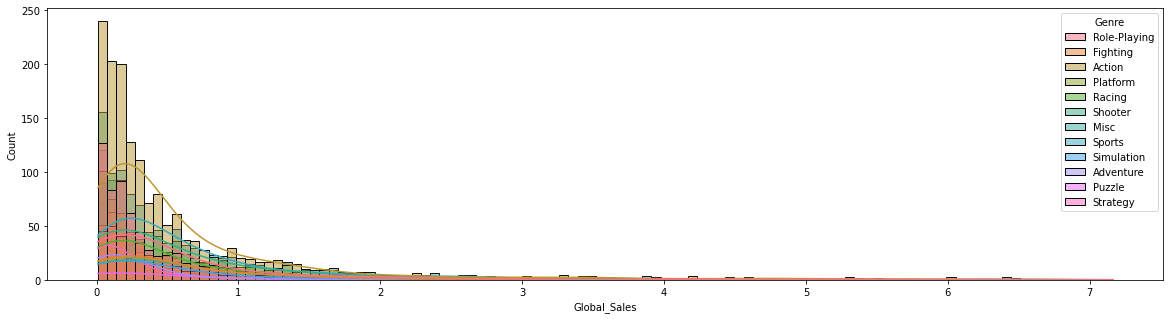

In [17]:
fig = plt.figure(figsize=[20,5])
sns.histplot(data=df,x='Global_Sales',hue='Genre',kde=True)

In [18]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

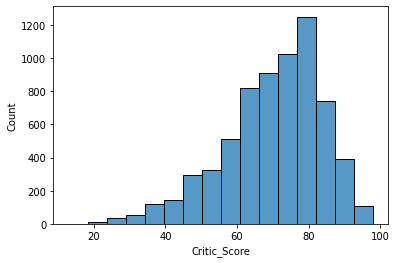

In [19]:
sns.histplot(data=df,x='Critic_Score',bins=16)

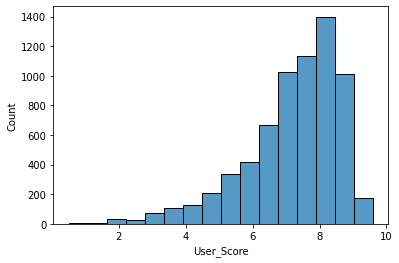

In [20]:
sns.histplot(data=df['User_Score'].apply(float),bins=16)

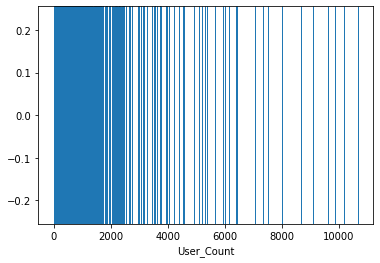

In [21]:
sns.rugplot(data=df,x='User_Count',height=1)

In [22]:
uc1 = df['User_Count'].quantile(0.96)

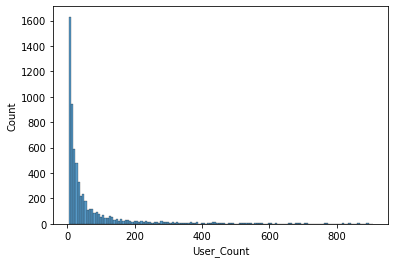

In [23]:
df = df[df['User_Count'] < uc1]
sns.histplot(x='User_Count',data=df)

### 문제 6. 수치형 데이터와 전국 판매량의 Jointplot 분석하기

In [24]:
df['User_Score'] = df['User_Score'].apply(float)

In [25]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

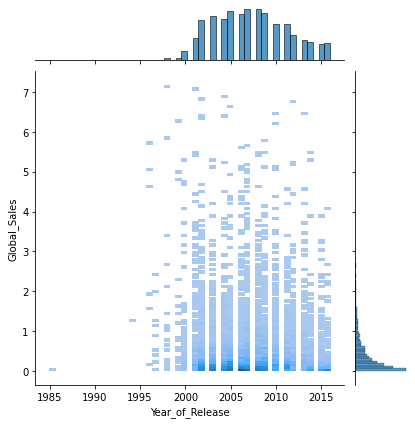

In [26]:
# 수치형 데이터와 전국 판매량의 관계를 Seaborn의 jointplot()으로 시각화/분석
sns.jointplot(x='Year_of_Release',y='Global_Sales',data=df,kind='hist')

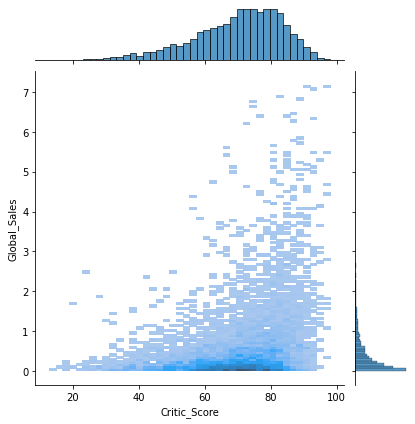

In [27]:
sns.jointplot(x='Critic_Score',y='Global_Sales',data=df,kind='hist')

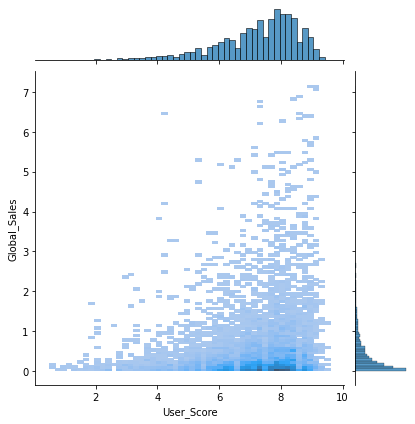

In [28]:
sns.jointplot(x='User_Score',y='Global_Sales',data=df,kind='hist')

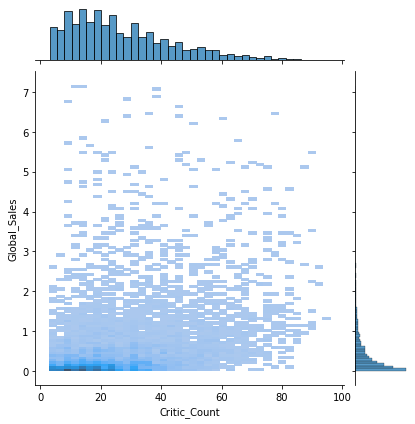

In [29]:
sns.jointplot(x='Critic_Count',y='Global_Sales',data=df,kind='hist')

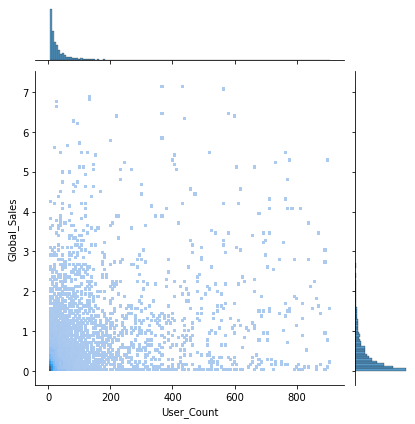

In [30]:
sns.jointplot(x='User_Count',y='Global_Sales',data=df,kind='hist')

In [31]:
# User_Count, User_Score를 빼고 생각해야하겠다.

### 문제 7. 범주형 데이터의 범주별 전국 판매량의 Boxplot 분석하기

In [32]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

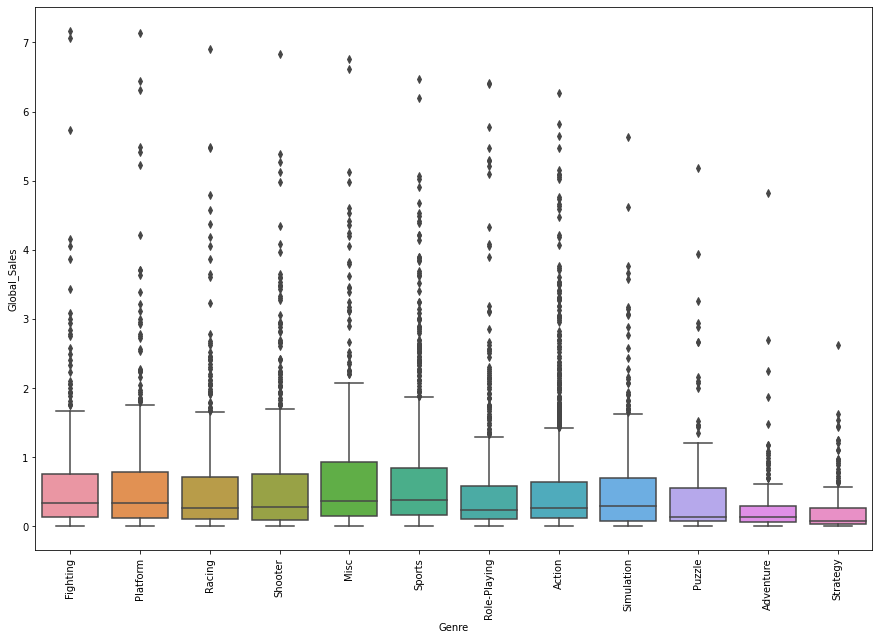

In [33]:
# 범주형 데이터별 전국 판매량의 Boxplot 시각화/분석
plt.figure(figsize=[15,10])
plt.xticks(rotation=90)
sns.boxplot(data=df,x='Genre',y='Global_Sales')

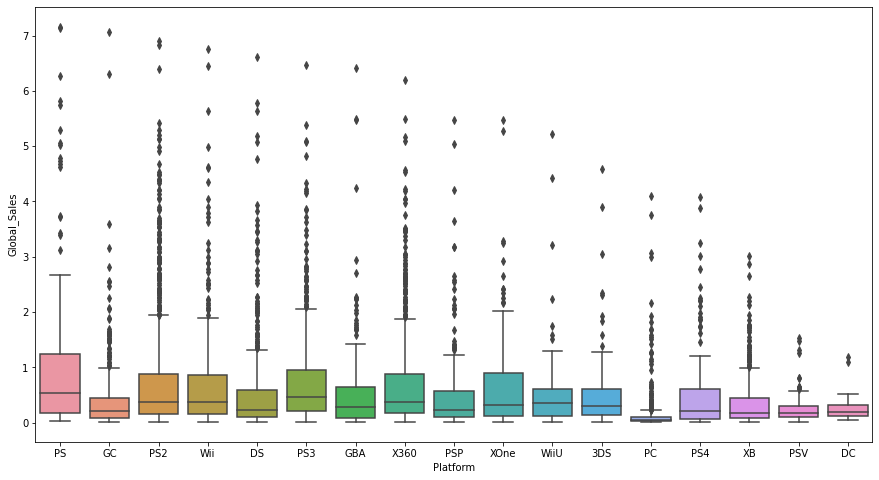

In [34]:
plt.figure(figsize=[15,8])
sns.boxplot(data=df,x='Platform',y='Global_Sales')

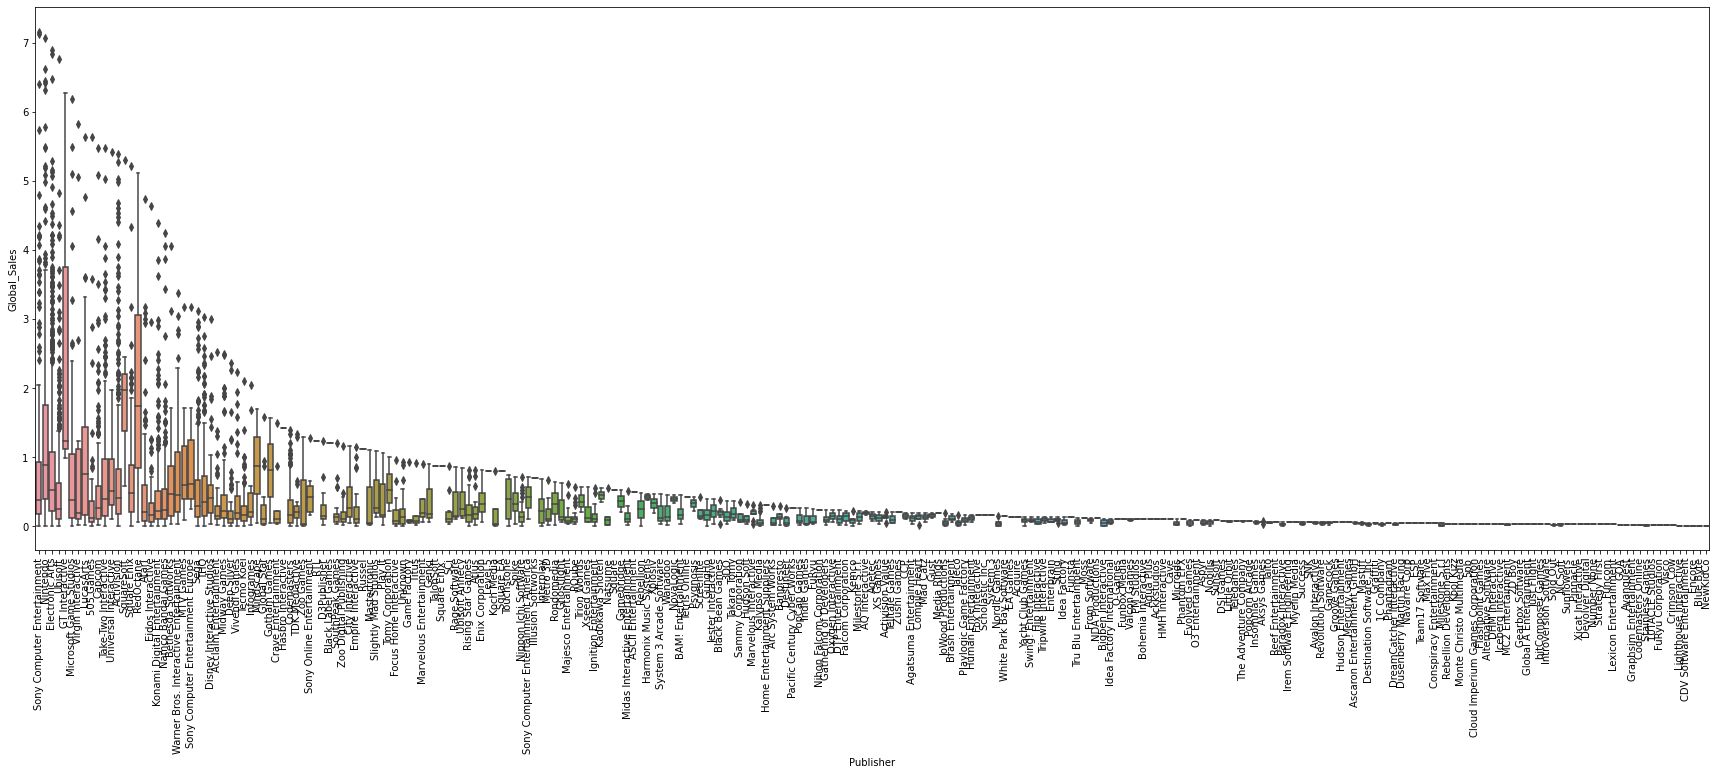

In [35]:
plt.figure(figsize=[30,10])
plt.xticks(rotation=90)
sns.boxplot(data=df,x='Publisher',y='Global_Sales')

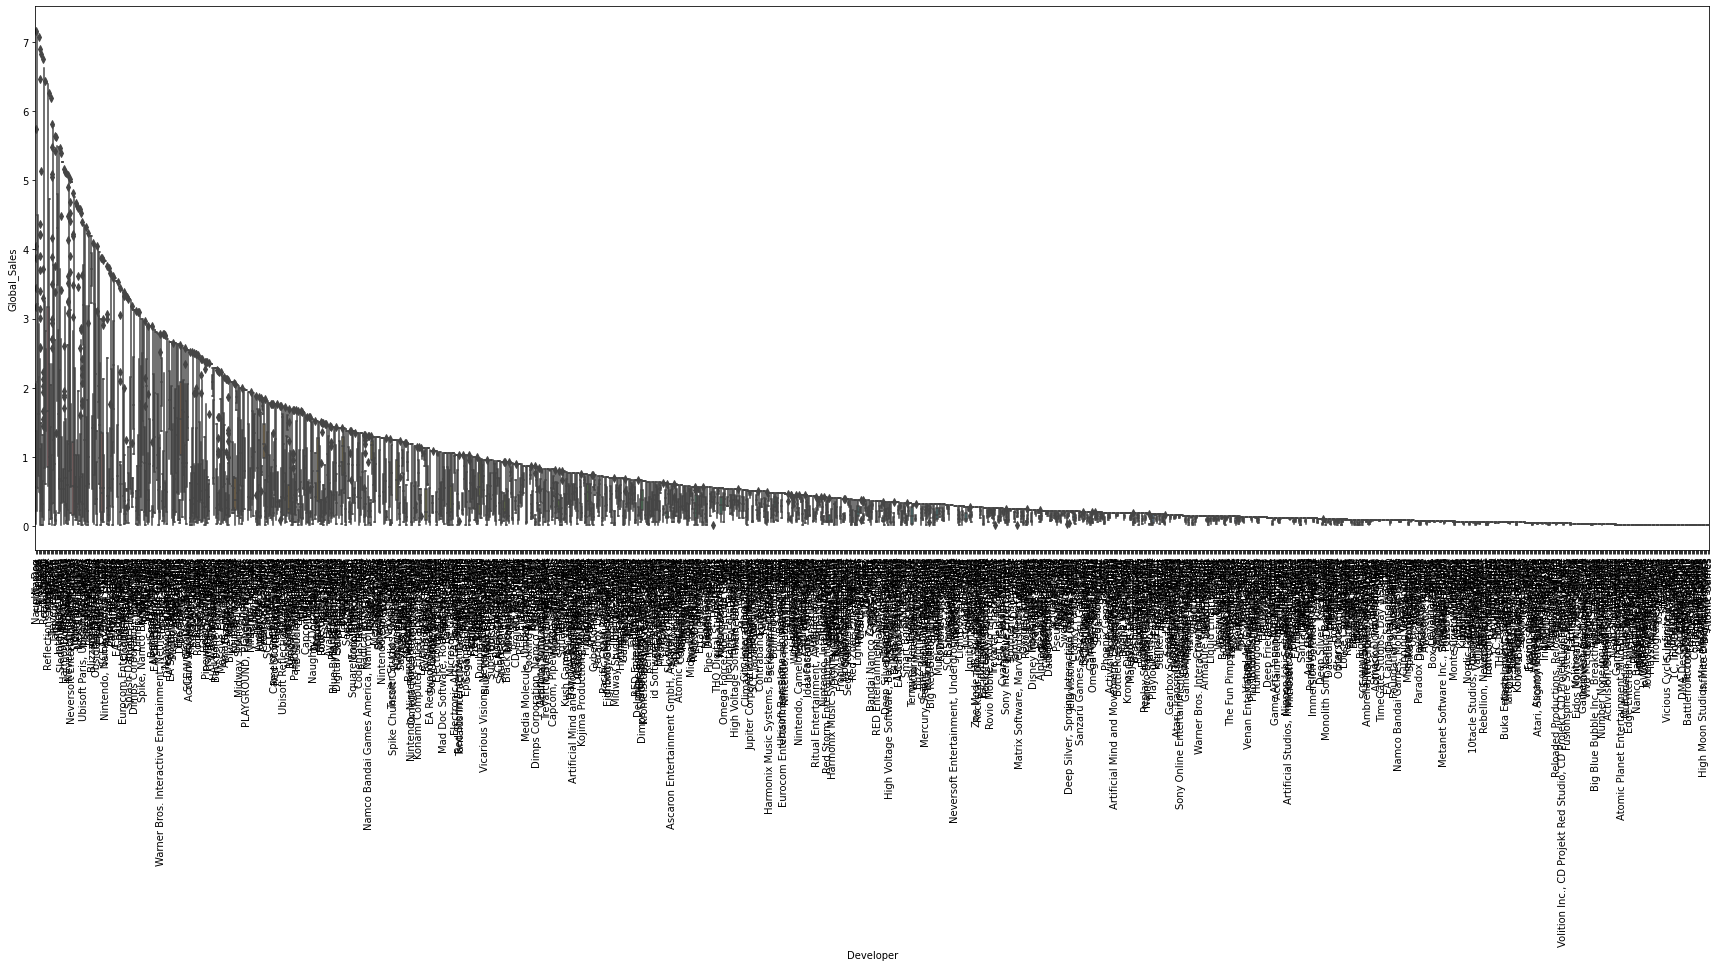

In [36]:
plt.figure(figsize=[30,10])
plt.xticks(rotation=90)
sns.boxplot(data=df,x='Developer',y='Global_Sales')

### 문제 8. 전문가 평점과 사용자 평점의 차이 분석하기

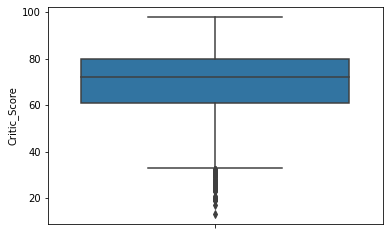

In [37]:
# Seaborn 시각화로 전문가 평점과 사용자 평점의 통계 비교/분석하기
# Hint) 두 값의 범위가 다르므로, 범위를 동일하게 맞추어 비교
# Tip) 별도의 DataFrame을 구성하여 boxplot으로 비교하면 편리함
sns.boxplot(y='Critic_Score',data=df)

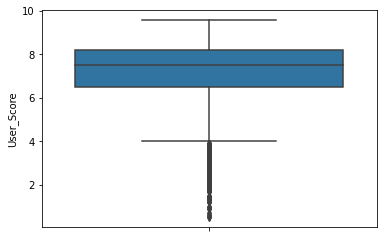

In [38]:
sns.boxplot(y='User_Score',data=df)

In [39]:
df['User_Score'].value_counts()

7.8    288
8.0    249
8.2    241
7.5    227
7.7    219
      ... 
1.9      2
1.3      1
0.6      1
0.9      1
0.7      1
Name: User_Score, Length: 89, dtype: int64

In [40]:
df['Critic_Count'].value_counts()

17.0    194
11.0    179
12.0    171
9.0     171
16.0    170
       ... 
92.0      1
87.0      1
93.0      1
89.0      1
96.0      1
Name: Critic_Count, Length: 92, dtype: int64

In [41]:
critic_score = df[['Critic_Score']].copy()
critic_score.rename({'Critic_Score':'Score'},axis=1,inplace=True)
critic_score['ScoreBy'] = 'Critics'

In [42]:
critic_score

,Score,ScoreBy
106,96.0,Critics
109,91.0,Critics
111,92.0,Critics
113,82.0,Critics
114,88.0,Critics
...,...,...
16667,46.0,Critics
16677,81.0,Critics
16696,80.0,Critics
16700,61.0,Critics


In [43]:
user_score = df[['User_Score']].copy() * 10
user_score.rename({'User_Score':'Score'},axis=1,inplace=True)
user_score['ScoreBy'] = 'Users'

In [44]:
user_score

,Score,ScoreBy
106,91.0,Users
109,89.0,Users
111,91.0,Users
113,86.0,Users
114,85.0,Users
...,...,...
16667,24.0,Users
16677,88.0,Users
16696,76.0,Users
16700,58.0,Users


In [45]:
scores = pd.concat([critic_score,user_score],axis=0)
scores.head()

,Score,ScoreBy
106,96.0,Critics
109,91.0,Critics
111,92.0,Critics
113,82.0,Critics
114,88.0,Critics


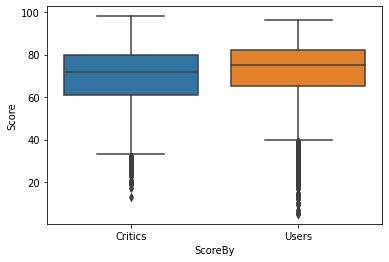

In [46]:
sns.boxplot(x='ScoreBy',y='Score',data=scores)

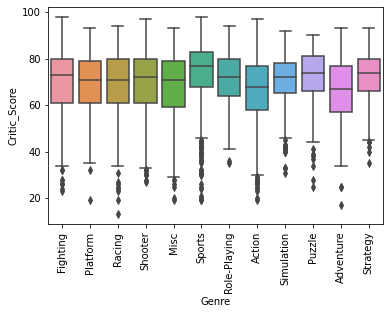

In [47]:
plt.xticks(rotation=90)
sns.boxplot(x='Genre',y='Critic_Score',data=df)

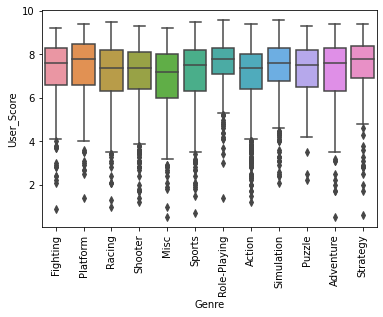

In [48]:
plt.xticks(rotation=90)
sns.boxplot(x='Genre',y='User_Score',data=df)

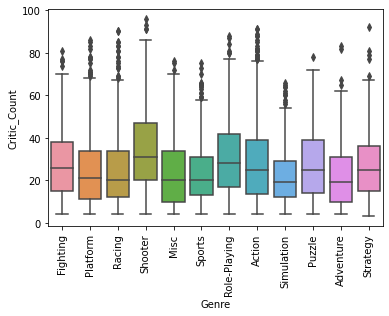

In [49]:
plt.xticks(rotation=90)
sns.boxplot(x='Genre',y='Critic_Count',data=df)

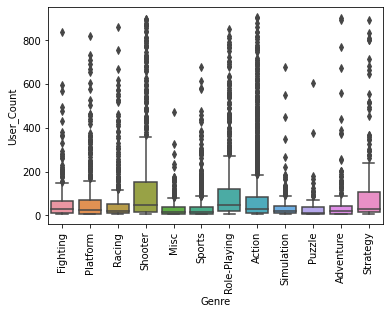

In [50]:
plt.xticks(rotation=90)
sns.boxplot(x='Genre',y='User_Count',data=df)

### 문제 9. 수치형 데이터간의 상관성 시각화하기

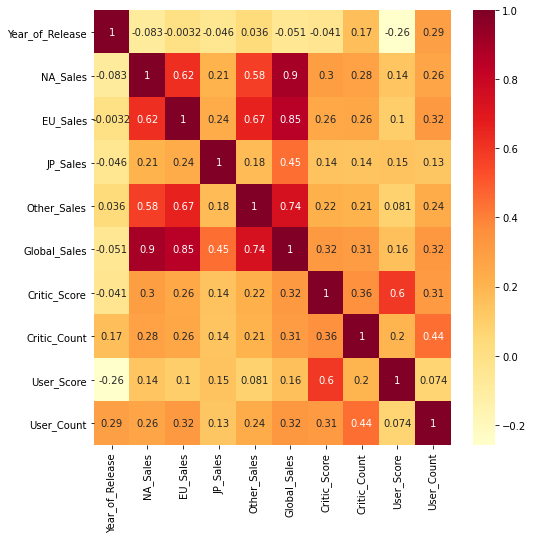

In [51]:
# Correlation Heatmap 시각화하기
fig = plt.figure(figsize=[8,8])
sns.heatmap(df.corr(),annot=True,cmap='YlOrRd')

## Step 3. 모델 학습을 위한 데이터 전처리 

### 문제 10. 범주형 데이터에서 소수 범주를 others로 대체하기

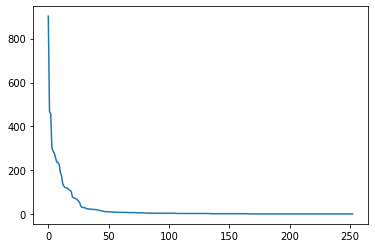

In [52]:
# 범주형 데이터 중 범주가 너무 적은 경우 others 범주로 대체하기
# Hint) value_counts()를 이용하여 범주별 개수를 확인
pb = df['Publisher'].value_counts()
plt.plot(range(len(pb)),pb)

In [53]:
df['Publisher'] = df['Publisher'].apply(lambda s:s if s not in pb[20:] else 'others')

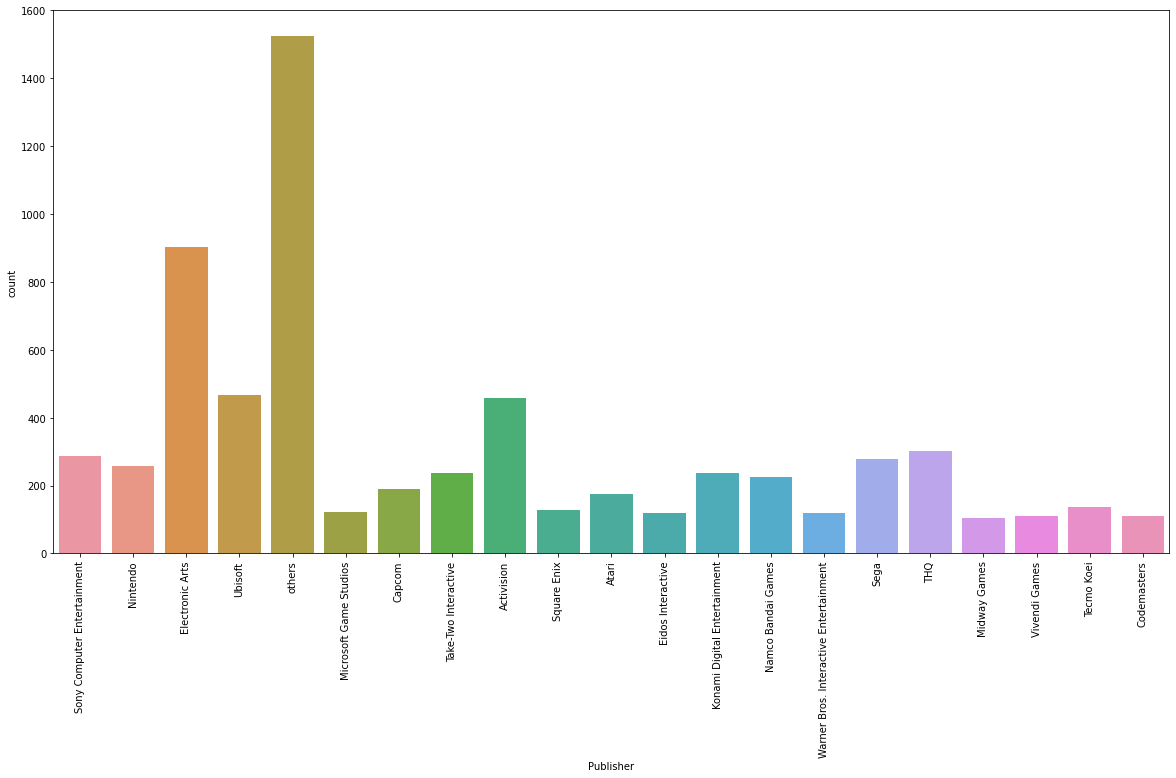

In [54]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.countplot(x='Publisher',data=df)
plt.show()


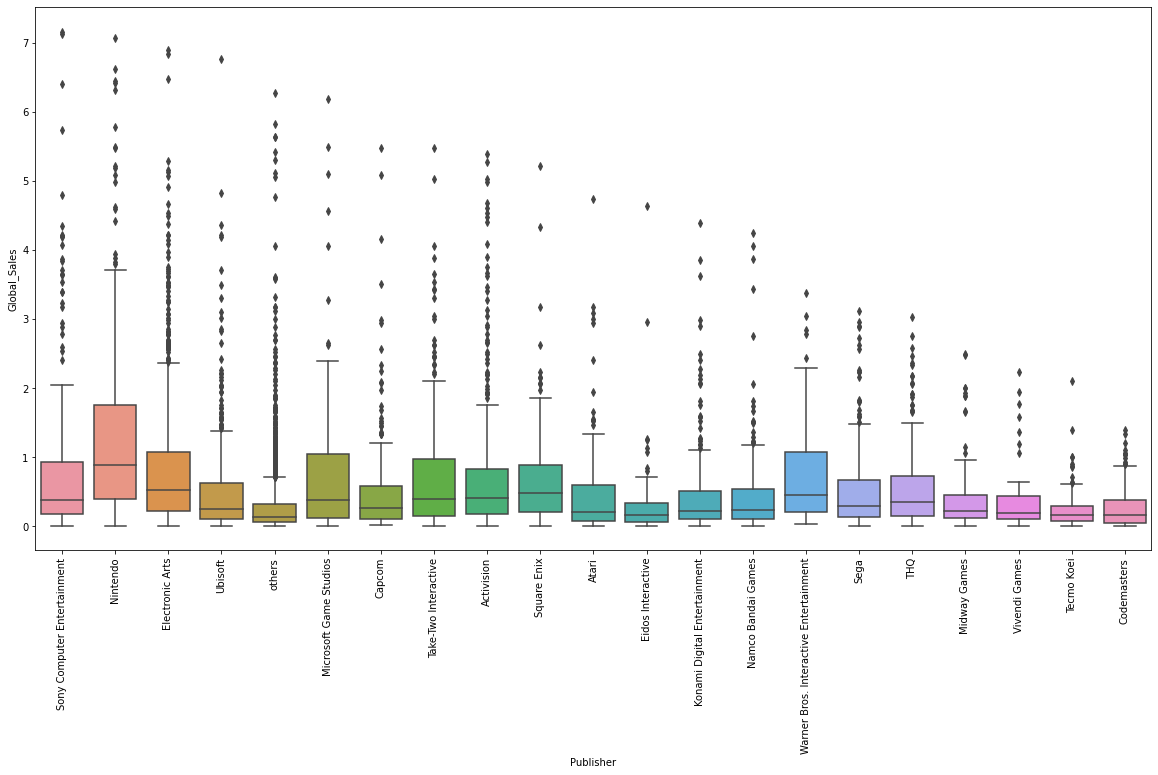

In [55]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.boxplot(data=df,x='Publisher',y='Global_Sales')

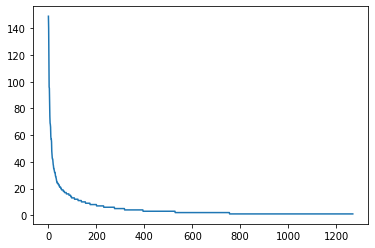

In [56]:
dev = df['Developer'].value_counts()
plt.plot(range(len(dev)),dev)

In [57]:
df['Developer'] = df['Developer'].apply(lambda s:s if s not in dev[20:] else 'others')

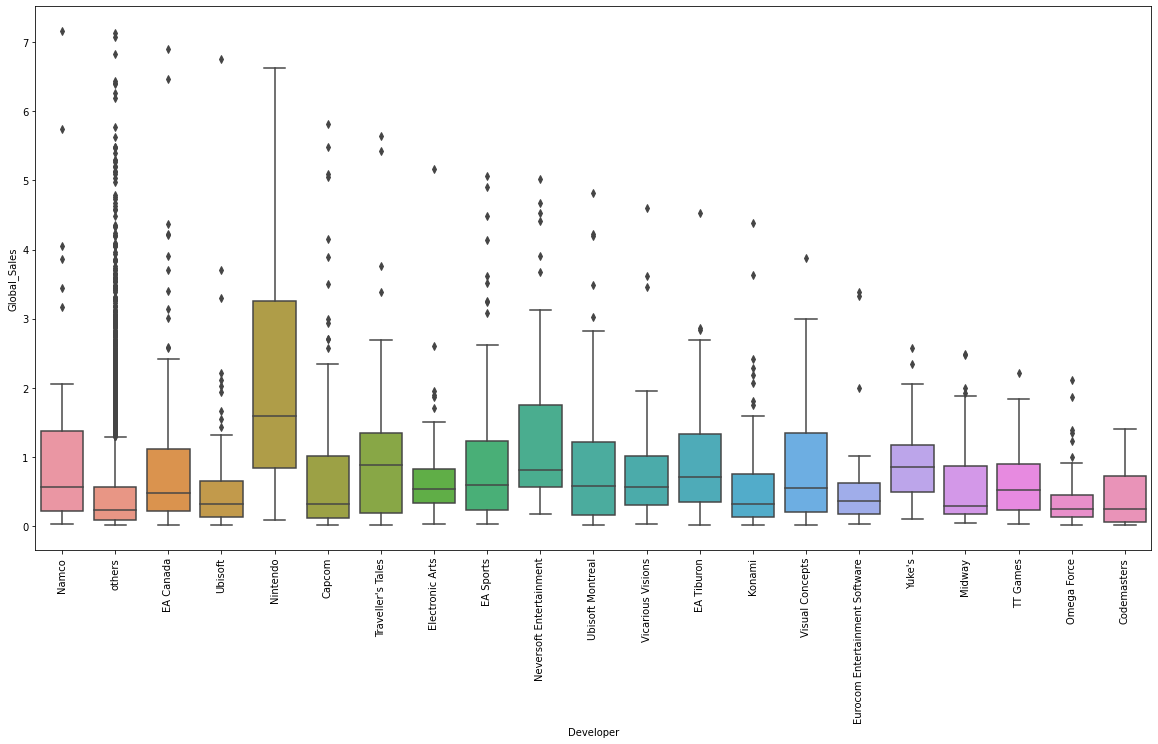

In [58]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.boxplot(data=df,x='Developer',y='Global_Sales')

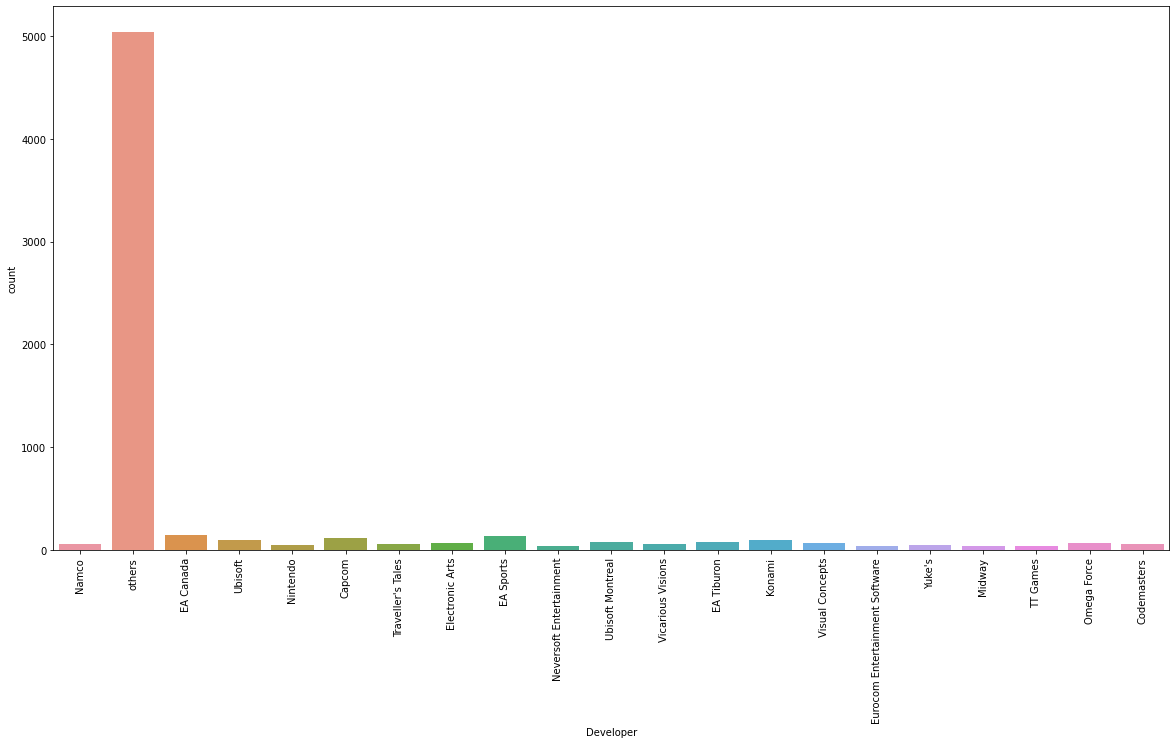

In [59]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.countplot(x='Developer',data=df)
plt.show()

### 문제 11. get_dummies를 이용한 범주형 데이터 전처리


In [61]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [81]:
X_cat = df[['Platform','Genre','Publisher']]
X_cat = pd.get_dummies(X_cat,drop_first=True)

In [82]:
X_cat

,Platform_DC,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,Platform_PSV,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Publisher_Atari,Publisher_Capcom,Publisher_Codemasters,Publisher_Eidos Interactive,Publisher_Electronic Arts,Publisher_Konami Digital Entertainment,Publisher_Microsoft Game Studios,Publisher_Midway Games,Publisher_Namco Bandai Games,Publisher_Nintendo,Publisher_Sega,Publisher_Sony Computer Entertainment,Publisher_Square Enix,Publisher_THQ,Publisher_Take-Two Interactive,Publisher_Tecmo Koei,Publisher_Ubisoft,Publisher_Vivendi Games,Publisher_Warner Bros. Interactive Entertainment,Publisher_others
106,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
109,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
111,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
113,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
114,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
16677,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
16696,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16700,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## Step 4. 전국 판매량 Regression 모델 학습하기

### 문제 12. 전국 판매량 추정을 위한 입출력 데이터 구성하기


In [83]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [84]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [85]:
# 전국 판매량 추정을 위해 적절한 입력과 출력 컬럼 선정
# 수치형 데이터는 StandardScaler를 이용해 표준화
X_num = df[['Year_of_Release', 'Critic_Score','Critic_Count']]
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled,index=X_num.index,columns=X_num.columns)
X = pd.concat([X_scaled,X_cat],axis=1)
y = df['Global_Sales']

In [86]:
X

,Year_of_Release,Critic_Score,Critic_Count,Platform_DC,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,Platform_PSV,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Publisher_Atari,Publisher_Capcom,Publisher_Codemasters,Publisher_Eidos Interactive,Publisher_Electronic Arts,Publisher_Konami Digital Entertainment,Publisher_Microsoft Game Studios,Publisher_Midway Games,Publisher_Namco Bandai Games,Publisher_Nintendo,Publisher_Sega,Publisher_Sony Computer Entertainment,Publisher_Square Enix,Publisher_THQ,Publisher_Take-Two Interactive,Publisher_Tecmo Koei,Publisher_Ubisoft,Publisher_Vivendi Games,Publisher_Warner Bros. Interactive Entertainment,Publisher_others
106,-2.237683,1.945186,-0.704155,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
109,-2.237683,1.578305,-0.874149,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
111,-1.514621,1.651681,0.599135,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
113,-0.791559,0.917920,0.655800,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
114,-1.273600,1.358177,0.089152,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,-1.514621,-1.723620,-1.327468,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
16677,-1.273600,0.844544,-0.874149,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
16696,1.618648,0.771168,-0.420831,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16700,0.895586,-0.622979,-0.874149,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [88]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

### 문제 13. XGBoost 모델 생성/학습하기

In [89]:
from xgboost import XGBRegressor

In [91]:
# XGBRegressor 모델 생성/학습
model_xgb = XGBRegressor()
model_xgb.fit(X_train,y_train)

[02:55:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

### 문제 14. Linear Regression 모델 생성/학습하기

In [92]:
from sklearn.linear_model import LinearRegression

In [93]:
# LinearRegression 모델 생성/학습
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 문제 15. 모델 학습 결과 평가하기

In [94]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [96]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred_xgb = model_xgb.predict(X_test)
pred_lr = model_lr.predict(X_test)
print('XGB MAE : ',mean_absolute_error(y_test,pred_xgb))
print('XGB RMSE : ',sqrt(mean_squared_error(y_test,pred_xgb)))
print('LR MAE : ',mean_absolute_error(y_test,pred_lr))
print('LR RMSE : ',sqrt(mean_squared_error(y_test,pred_lr)))

XGB MAE :  0.4113122738841137
XGB RMSE :  0.6952811642387839
LR MAE :  0.4434712815219381
LR RMSE :  0.6960047646001658


### 문제 16. 실제 값과 추측 값의 Scatter plot 시각화하기


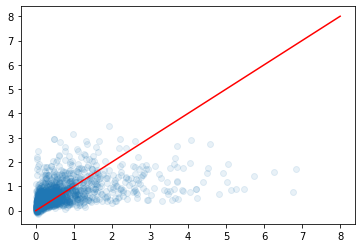

In [103]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기
plt.scatter(y_test,pred_xgb,alpha=0.1)
plt.plot([0,8],[0,8],'r-')

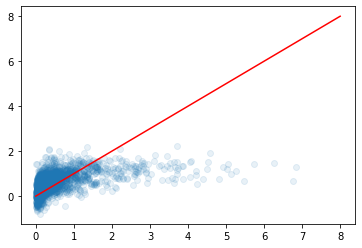

In [104]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기
plt.scatter(y_test,pred_lr,alpha=0.1)
plt.plot([0,8],[0,8],'r-')

### 문제 17. XGBoost 모델의 Feature Importance 시각화하기

<BarContainer object of 50 artists>

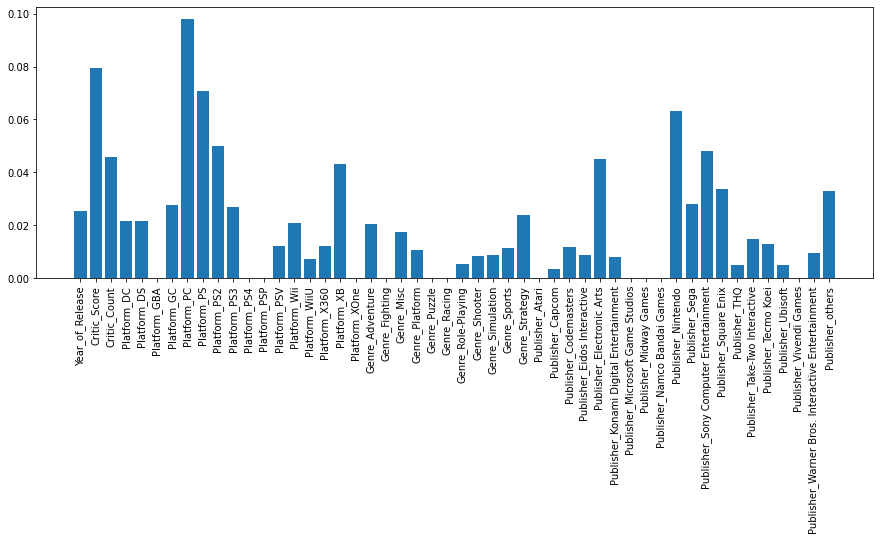

In [107]:
fig = plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.bar(X.columns,model_xgb.feature_importances_)

## Step 5. 유저 평점 Regression 모델 학습하기

### 문제 18. 유저 평점 추정을 위한 입출력 데이터 구성하기


In [112]:
# 유저 평점 추정을 위해 적절한 입력과 출력 컬럼 선정
# 수치형 데이터는 StandardScaler를 이용해 표준화
X_num = df[['Year_of_Release','Critic_Score','Critic_Count']]
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index= X_num.index, columns=X_num.columns)
X = pd.concat([X_scaled,X_cat],axis=1)
y = df['User_Score']

In [113]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

### 문제 19. XGBoost 모델 생성/학습하기

In [114]:
# XGBRegressor 모델 생성/학습
model_xgb = XGBRegressor()
model_xgb.fit(X_train,y_train)




[03:28:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

### 문제 20. Linear Regression 모델 생성/학습하기

In [115]:
# LinearRegression 모델 생성/학습
model_lr = LinearRegression()
model_lr.fit(X_train,y_train) 




LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 문제 21. 모델 학습 결과 평가하기

In [116]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred_xgb = model_xgb.predict(X_test)
pred_lr = model_lr.predict(X_test)
print('XGB MAE : ',mean_absolute_error(y_test,pred_xgb))
print('XGB RMSE : ',sqrt(mean_squared_error(y_test,pred_xgb)))
print('LR MAE : ',mean_absolute_error(y_test,pred_lr))
print('LR RMSE : ',sqrt(mean_squared_error(y_test,pred_lr)))

XGB MAE :  0.77708375872958
XGB RMSE :  1.0642018228099366
LR MAE :  0.7948629606163901
LR RMSE :  1.0822436599585932


### 문제 22. 실제 값과 추측 값의 Scatter plot 시각화하기


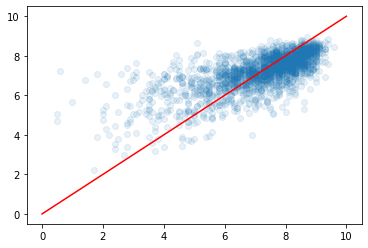

In [121]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기
plt.scatter(y_test,pred_xgb,alpha=0.1)
plt.plot([0,10],[0,10],'r-')

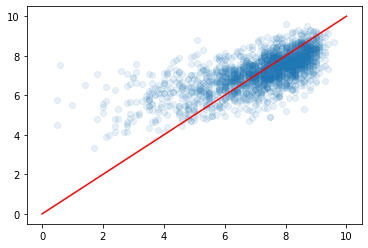

In [120]:
plt.scatter(y_test,pred_lr,alpha=0.1)
plt.plot([0,10],[0,10],'r-')

### 문제 23. XGBoost 모델의 Feature Importance 시각화하기

<BarContainer object of 50 artists>

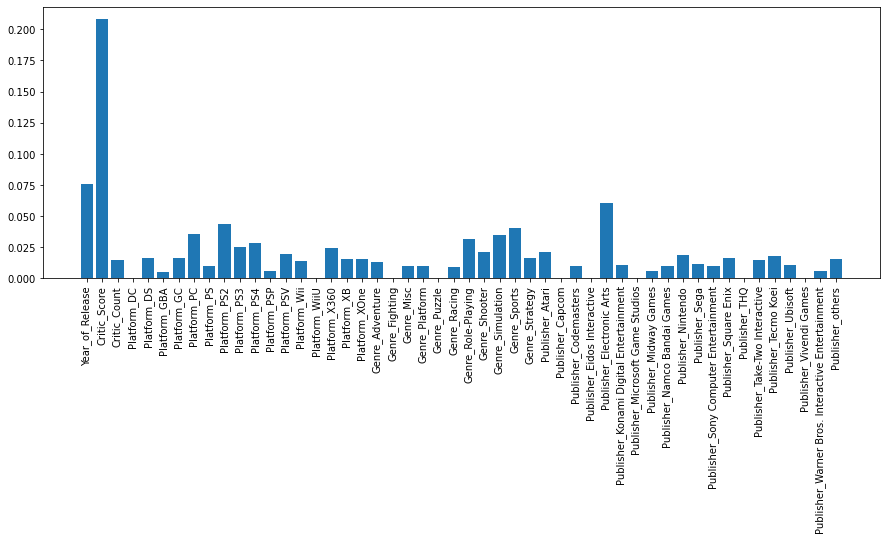

In [119]:
fig = plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.bar(X.columns,model_xgb.feature_importances_)